In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import itertools

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [3]:
play= pd.read_csv('../nfl/PlayList.csv')
player = pd.read_csv('../nfl/PlayerTrackData.csv')
injury= pd.read_csv('../nfl/InjuryRecord.csv')

In [4]:
unique_players = play.PlayerKey.nunique()
unique_games = play.GameID.nunique()
unique_plays = play.PlayKey.nunique()

print('There are {} players in the dataset.'.format(unique_players))
print('There are {} games in the dataset.'.format(unique_games))
print('There are {} plays in the dataset.'.format(unique_plays))

There are 250 players in the dataset.
There are 5712 games in the dataset.
There are 267005 plays in the dataset.


In [5]:
injury.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [17]:
injury.count()

PlayerKey          105
GameID             105
PlayKey             77
BodyPart           105
Surface            105
DM_M1              105
DM_M7              105
DM_M28             105
DM_M42             105
level of injury    105
dtype: int64

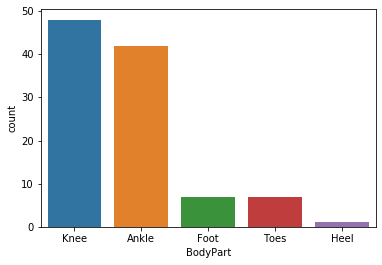

In [6]:
sns.countplot(x="BodyPart", data=injury)

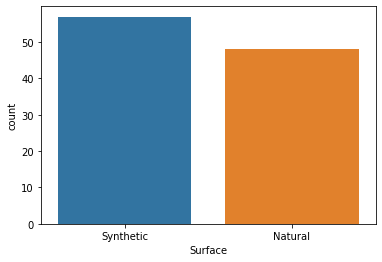

In [35]:

sns.countplot(x="Surface", data=injury)

In [34]:
injury['Surface'].value_counts()

Synthetic    57
Natural      48
Name: Surface, dtype: int64

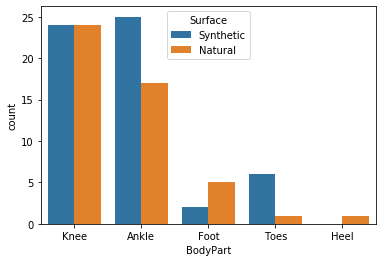

In [8]:
sns.countplot(x="BodyPart", data=injury, hue='Surface')

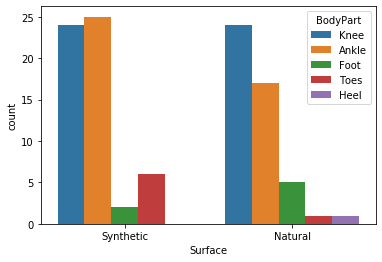

In [9]:
sns.countplot(x="Surface", data=injury, hue='BodyPart')

In [10]:
#count the level of injury. higher number means more serious
#add another colums
#https://stackoverflow.com/questions/33750326/compute-row-average-in-pandas
injury['level of injury'] = injury[['DM_M1','DM_M7','DM_M28','DM_M42']].sum(axis=1)

In [11]:
injury.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,level of injury
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,4
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,2
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,4
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,1
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,4


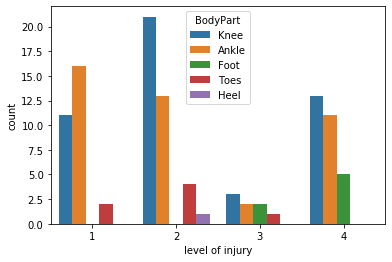

In [12]:
sns.countplot(x="level of injury", data=injury, hue='BodyPart')

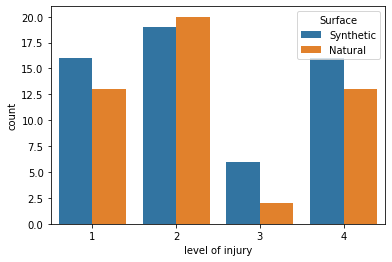

In [13]:
sns.countplot(x="level of injury", data=injury, hue='Surface')

In [14]:
#select knee injury
#knee_synthetic=injury.loc[(injury['BodyPart'] == 'Knee') & (injury['Surface'] == 'Synthetic')]